# Analysis

In [1]:
import pandas as pd
from aaai20.io import filename_results

import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
def plot():
    dfs = []
    for name in {'weka', 'mi', 'mrai', 'mrai-new','it', 'it-new', 'rw', 'rw-new'}:
        fn = filename_results(name)
        dfs.append(pd.read_csv(fn))

    df = pd.concat(dfs)

    #df = df[df['dataset'] == 'vehicle']
    #df = df[df['dataset'].isin(('glass', 'credit-g', 'ionosphere', 'lymph', 'vehicle'))]

    df_plot = df[['dataset', 'F1', 'difficulty', 'algorithm']].groupby(by=['algorithm', 'difficulty']).mean()


    df_plot.head()

    # Visuals
    algorithms = df_plot.index.levels[0].unique().values.tolist()

    x = df_plot.index.levels[1].values.tolist()

    y = dict()
    labels = []

    fig=plt.figure(figsize=(12, 8))
    for trace in algorithms:
        y[trace] = df_plot.loc[trace].values
        plt.plot(x, y[trace])
        labels.append(trace)



    plt.legend(labels, loc='lower left')
    plt.show()
    return

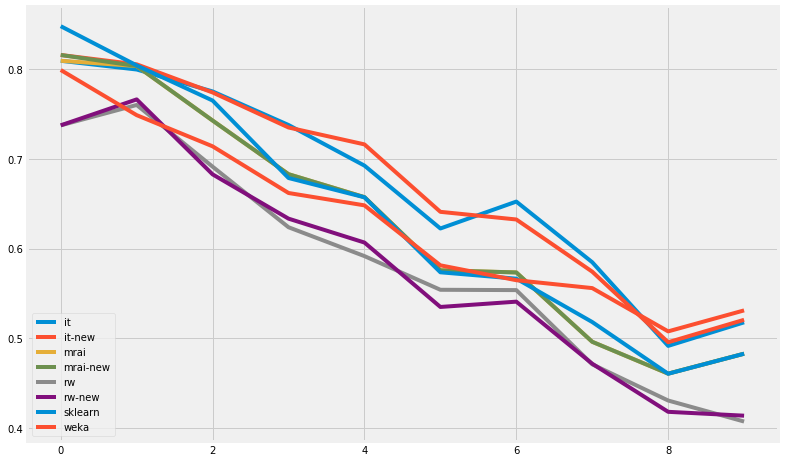

In [3]:
plot()